In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df_A = pd.read_csv("Datasets\df_A.csv")
df_B = pd.read_csv("Datasets\df_B.csv")

In [9]:
df_A

,LOCATION,DATE_TIME,DATE,TIME,SENSOR_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,A,2020-05-15 00:00:00,2020-05-15,00:00:00,sensor 1,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0
1,A,2020-05-15 00:00:00,2020-05-15,00:00:00,sensor 2,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0
2,A,2020-05-15 00:00:00,2020-05-15,00:00:00,sensor 3,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0
3,A,2020-05-15 00:00:00,2020-05-15,00:00:00,sensor 5,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0
4,A,2020-05-15 00:00:00,2020-05-15,00:00:00,sensor 12,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
68773,A,2020-06-17 23:45:00,2020-06-17,23:45:00,sensor 37,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0
68774,A,2020-06-17 23:45:00,2020-06-17,23:45:00,sensor 39,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0
68775,A,2020-06-17 23:45:00,2020-06-17,23:45:00,sensor 42,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0
68776,A,2020-06-17 23:45:00,2020-06-17,23:45:00,sensor 43,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0


In [10]:
df_B

,LOCATION,DATE_TIME,DATE,TIME,SENSOR_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,B,2020-05-15 00:00:00,2020-05-15,00:00:00,sensor 4,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0
1,B,2020-05-15 00:00:00,2020-05-15,00:00:00,sensor 6,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0
2,B,2020-05-15 00:00:00,2020-05-15,00:00:00,sensor 7,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0
3,B,2020-05-15 00:00:00,2020-05-15,00:00:00,sensor 8,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0
4,B,2020-05-15 00:00:00,2020-05-15,00:00:00,sensor 9,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
67693,B,2020-06-17 23:45:00,2020-06-17,23:45:00,sensor 33,0.0,0.0,4157.000000,5.207580e+05,23.202871,22.535908,0.0
67694,B,2020-06-17 23:45:00,2020-06-17,23:45:00,sensor 35,0.0,0.0,3931.000000,1.211314e+08,23.202871,22.535908,0.0
67695,B,2020-06-17 23:45:00,2020-06-17,23:45:00,sensor 38,0.0,0.0,4322.000000,2.427691e+06,23.202871,22.535908,0.0
67696,B,2020-06-17 23:45:00,2020-06-17,23:45:00,sensor 40,0.0,0.0,4218.000000,1.068964e+08,23.202871,22.535908,0.0


In [21]:
sensor_1_df = df_B[(df_B['SENSOR_ID'] == 'sensor 4')]

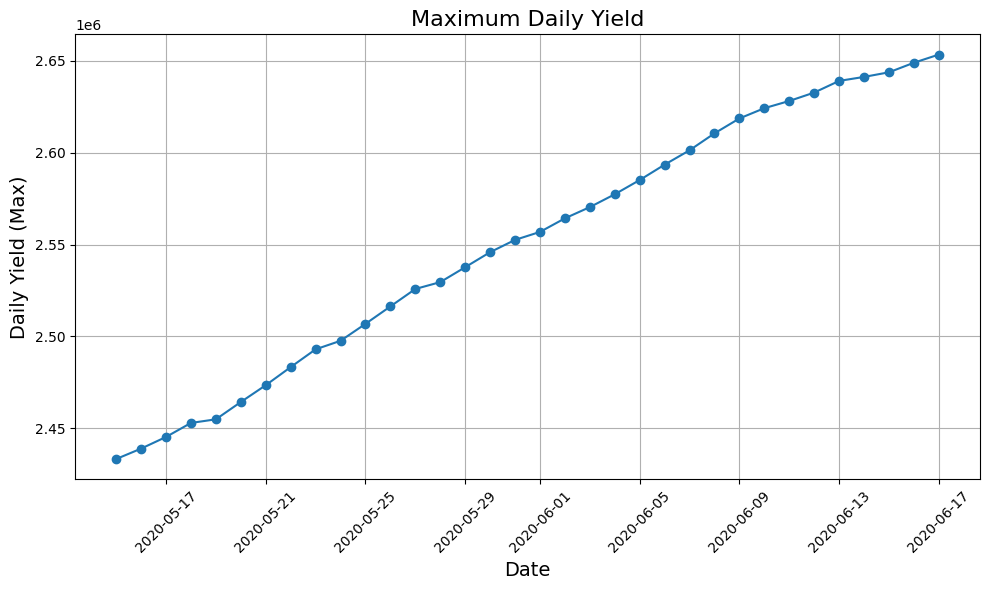

In [33]:
import matplotlib.pyplot as plt

# Group by date and calculate maximum DAILY_YIELD
daily_yield_max = sensor_1_df.groupby(sensor_1_df['DATE_TIME'].dt.date)['TOTAL_YIELD'].max().reset_index()
daily_yield_max.columns = ['DATE', 'MAX_DAILY_YIELD']

# Plot the maximum DAILY_YIELD for each day
plt.figure(figsize=(10, 6))
plt.plot(daily_yield_max['DATE'], daily_yield_max['MAX_DAILY_YIELD'], marker='o')
plt.title("Maximum Daily Yield", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Daily Yield (Max)", fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Akindu Himan\AppData\Local\Temp\ipykernel_10448\740343513.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_1_df['DATE_TIME'] = pd.to_datetime(sensor_1_df['DATE_TIME'])


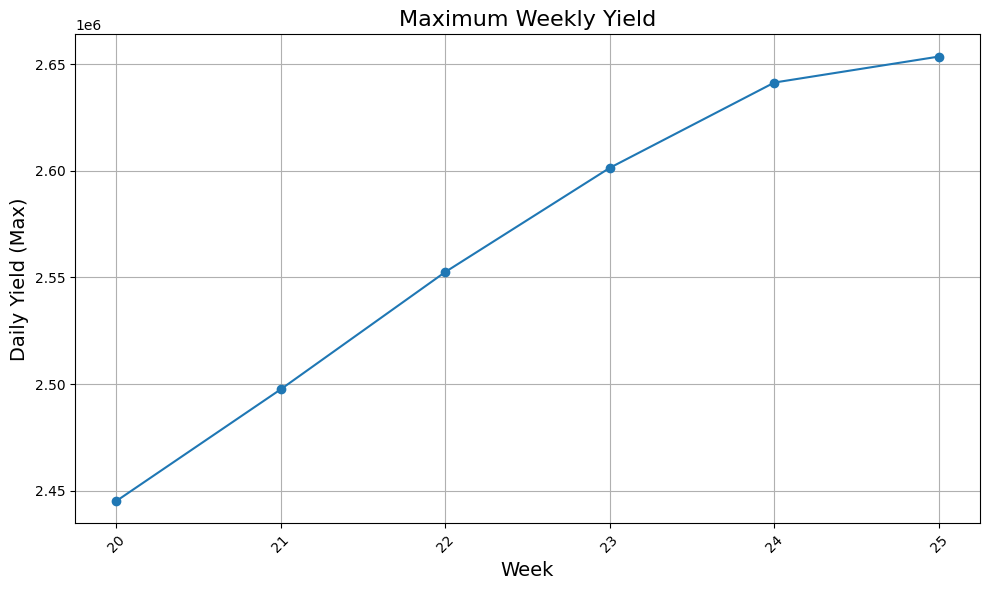

In [32]:
import matplotlib.pyplot as plt

# Ensure DATE_TIME is in datetime format
sensor_1_df['DATE_TIME'] = pd.to_datetime(sensor_1_df['DATE_TIME'])

# Group by week and calculate maximum DAILY_YIELD
weekly_yield_max = sensor_1_df.groupby(sensor_1_df['DATE_TIME'].dt.isocalendar().week)['TOTAL_YIELD'].max().reset_index()
weekly_yield_max.columns = ['WEEK', 'MAX_DAILY_YIELD']

# Plot the maximum DAILY_YIELD for each week
plt.figure(figsize=(10, 6))
plt.plot(weekly_yield_max['WEEK'], weekly_yield_max['MAX_DAILY_YIELD'], marker='o')
plt.title("Maximum Weekly Yield", fontsize=16)
plt.xlabel("Week", fontsize=14)
plt.ylabel("Daily Yield (Max)", fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
